In [5]:
!pip install findspark

In [6]:
import findspark
findspark.init('C:\Spark')

In [7]:
from pyspark import SparkContext

In [8]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 

In [9]:
import pyspark
from pyspark import SparkContext
from pyspark.sql import SparkSession
from pyspark.conf import SparkConf

In [10]:
spark = SparkSession.builder \
    .master("local") \
    .appName("pyspark_giris") \
    .getOrCreate()
    
sc = spark.sparkContext

In [11]:
sc

<SparkContext master=local appName=pyspark_giris>

In [12]:
#sc.stop()

Temel DataFrame İşlemleri

In [14]:
spark_df = spark.read.csv("./churn.csv", header = True, inferSchema = True)

In [15]:
spark_df

DataFrame[_c0: int, Names: string, Age: double, Total_Purchase: double, Account_Manager: int, Years: double, Num_Sites: double, Churn: int]

In [16]:
type(spark_df)

pyspark.sql.dataframe.DataFrame

In [17]:
spark_df.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- Names: string (nullable = true)
 |-- Age: double (nullable = true)
 |-- Total_Purchase: double (nullable = true)
 |-- Account_Manager: integer (nullable = true)
 |-- Years: double (nullable = true)
 |-- Num_Sites: double (nullable = true)
 |-- Churn: integer (nullable = true)



In [18]:
import seaborn as sns
df = sns.load_dataset("diamonds")

In [19]:
type(df)

pandas.core.frame.DataFrame

In [20]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [21]:
spark_df.head()

Row(_c0=0, Names='Cameron Williams', Age=42.0, Total_Purchase=11066.8, Account_Manager=0, Years=7.22, Num_Sites=8.0, Churn=1)

In [22]:
df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [23]:
spark_df.dtypes

[('_c0', 'int'),
 ('Names', 'string'),
 ('Age', 'double'),
 ('Total_Purchase', 'double'),
 ('Account_Manager', 'int'),
 ('Years', 'double'),
 ('Num_Sites', 'double'),
 ('Churn', 'int')]

In [24]:
df.ndim

2

In [25]:
spark_df.ndim

AttributeError: 'DataFrame' object has no attribute 'ndim'

In [27]:
spark_df.show()

+---+-------------------+----+--------------+---------------+-----+---------+-----+
|_c0|              Names| Age|Total_Purchase|Account_Manager|Years|Num_Sites|Churn|
+---+-------------------+----+--------------+---------------+-----+---------+-----+
|  0|   Cameron Williams|42.0|       11066.8|              0| 7.22|      8.0|    1|
|  1|      Kevin Mueller|41.0|      11916.22|              0|  6.5|     11.0|    1|
|  2|        Eric Lozano|38.0|      12884.75|              0| 6.67|     12.0|    1|
|  3|      Phillip White|42.0|       8010.76|              0| 6.71|     10.0|    1|
|  4|     Cynthia Norton|37.0|       9191.58|              0| 5.56|      9.0|    1|
|  5|   Jessica Williams|48.0|      10356.02|              0| 5.12|      8.0|    1|
|  6|        Eric Butler|44.0|      11331.58|              1| 5.23|     11.0|    1|
|  7|      Zachary Walsh|32.0|       9885.12|              1| 6.92|      9.0|    1|
|  8|        Ashlee Carr|43.0|       14062.6|              1| 5.46|     11.0

In [29]:
spark_df.show(3, truncate = True)

+---+----------------+----+--------------+---------------+-----+---------+-----+
|_c0|           Names| Age|Total_Purchase|Account_Manager|Years|Num_Sites|Churn|
+---+----------------+----+--------------+---------------+-----+---------+-----+
|  0|Cameron Williams|42.0|       11066.8|              0| 7.22|      8.0|    1|
|  1|   Kevin Mueller|41.0|      11916.22|              0|  6.5|     11.0|    1|
|  2|     Eric Lozano|38.0|      12884.75|              0| 6.67|     12.0|    1|
+---+----------------+----+--------------+---------------+-----+---------+-----+
only showing top 3 rows



In [31]:
spark_df.count()

900

In [32]:
spark_df.columns

['_c0',
 'Names',
 'Age',
 'Total_Purchase',
 'Account_Manager',
 'Years',
 'Num_Sites',
 'Churn']

In [33]:
spark_df.describe().show()

+-------+------------------+-------------+-----------------+-----------------+------------------+-----------------+------------------+-------------------+
|summary|               _c0|        Names|              Age|   Total_Purchase|   Account_Manager|            Years|         Num_Sites|              Churn|
+-------+------------------+-------------+-----------------+-----------------+------------------+-----------------+------------------+-------------------+
|  count|               900|          900|              900|              900|               900|              900|               900|                900|
|   mean|             449.5|         null|41.81666666666667|10062.82403333334|0.4811111111111111| 5.27315555555555| 8.587777777777777|0.16666666666666666|
| stddev|259.95191863111916|         null|6.127560416916251|2408.644531858096|0.4999208935073339|1.274449013194616|1.7648355920350969| 0.3728852122772358|
|    min|                 0|   Aaron King|             22.0|          

In [35]:
spark_df.describe('Age').show()

+-------+-----------------+
|summary|              Age|
+-------+-----------------+
|  count|              900|
|   mean|41.81666666666667|
| stddev|6.127560416916251|
|    min|             22.0|
|    max|             65.0|
+-------+-----------------+



In [36]:
spark_df.describe('Age','Names').show()

+-------+-----------------+-------------+
|summary|              Age|        Names|
+-------+-----------------+-------------+
|  count|              900|          900|
|   mean|41.81666666666667|         null|
| stddev|6.127560416916251|         null|
|    min|             22.0|   Aaron King|
|    max|             65.0|Zachary Walsh|
+-------+-----------------+-------------+



In [37]:
spark_df.select('Age', 'Names').show()

+----+-------------------+
| Age|              Names|
+----+-------------------+
|42.0|   Cameron Williams|
|41.0|      Kevin Mueller|
|38.0|        Eric Lozano|
|42.0|      Phillip White|
|37.0|     Cynthia Norton|
|48.0|   Jessica Williams|
|44.0|        Eric Butler|
|32.0|      Zachary Walsh|
|43.0|        Ashlee Carr|
|40.0|     Jennifer Lynch|
|30.0|       Paula Harris|
|45.0|     Bruce Phillips|
|45.0|       Craig Garner|
|40.0|       Nicole Olson|
|41.0|     Harold Griffin|
|38.0|       James Wright|
|45.0|      Doris Wilkins|
|43.0|Katherine Carpenter|
|53.0|     Lindsay Martin|
|46.0|        Kathy Curry|
+----+-------------------+
only showing top 20 rows



In [39]:
spark_df.filter(spark_df.Age > 40).count()

524

In [40]:
spark_df.filter(spark_df.Age > 40).show()

+---+-------------------+----+--------------+---------------+-----+---------+-----+
|_c0|              Names| Age|Total_Purchase|Account_Manager|Years|Num_Sites|Churn|
+---+-------------------+----+--------------+---------------+-----+---------+-----+
|  0|   Cameron Williams|42.0|       11066.8|              0| 7.22|      8.0|    1|
|  1|      Kevin Mueller|41.0|      11916.22|              0|  6.5|     11.0|    1|
|  3|      Phillip White|42.0|       8010.76|              0| 6.71|     10.0|    1|
|  5|   Jessica Williams|48.0|      10356.02|              0| 5.12|      8.0|    1|
|  6|        Eric Butler|44.0|      11331.58|              1| 5.23|     11.0|    1|
|  8|        Ashlee Carr|43.0|       14062.6|              1| 5.46|     11.0|    1|
| 11|     Bruce Phillips|45.0|       8771.02|              1| 6.64|     11.0|    1|
| 12|       Craig Garner|45.0|       8988.67|              1| 4.84|     11.0|    1|
| 14|     Harold Griffin|41.0|       6569.87|              1|  4.3|     11.0

In [43]:
spark_df.groupby('Churn').count().show()

+-----+-----+
|Churn|count|
+-----+-----+
|    1|  150|
|    0|  750|
+-----+-----+



In [44]:
spark_df.groupby('Churn').agg({'Age':'mean'}).show()

+-----+-----------------+
|Churn|         avg(Age)|
+-----+-----------------+
|    1|42.99333333333333|
|    0|41.58133333333333|
+-----+-----------------+



SQL ISLEMLERI

In [45]:
spark_df.createOrReplaceTempView("tbl_df")

In [46]:
spark.sql("show databases").show()

+---------+
|namespace|
+---------+
|  default|
+---------+



In [47]:
spark.sql("show tables").show()

+--------+---------+-----------+
|database|tableName|isTemporary|
+--------+---------+-----------+
|        |   tbl_df|       true|
+--------+---------+-----------+



In [48]:
spark.sql('select Age from tbl_df').show(5)

+----+
| Age|
+----+
|42.0|
|41.0|
|38.0|
|42.0|
|37.0|
+----+
only showing top 5 rows



In [49]:
spark.sql("select Churn, mean(Age) from tbl_df group by Churn").show()

+-----+-----------------+
|Churn|        mean(Age)|
+-----+-----------------+
|    1|42.99333333333333|
|    0|41.58133333333333|
+-----+-----------------+



Scenario: Python notebook tools may be installed on the server.

With simple connection settings, a connection between the final table on the server and python is provided, and the data becomes processable in python in the server environment.
Scenario: Final tables are created. It is done with SQL. Final tables have to be drawn to locale.

Screenplay: Big data

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
spark_df.groupby("Churn").agg({"Age":"mean"}).show()

+-----+-----------------+
|Churn|         avg(Age)|
+-----+-----------------+
|    1|42.99333333333333|
|    0|41.58133333333333|
+-----+-----------------+



In [52]:
spark_df.groupby("Churn").agg({"Age":"mean"}).toPandas()

,Churn,avg(Age)
0,1,42.993333
1,0,41.581333


In [53]:
sdf = spark_df.toPandas()

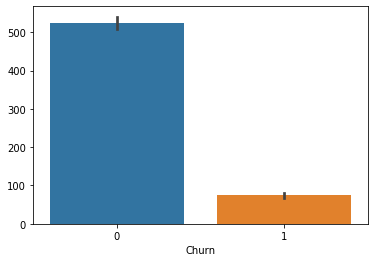

In [54]:
sns.barplot(x = "Churn", y = sdf.Churn.index, data = sdf);

Customer Abandonment Modeling with GBM

In [55]:
spark_df = spark.read.csv("./churn.csv", header = True,inferSchema = True)

In [56]:
spark_df.show(5)

+---+----------------+----+--------------+---------------+-----+---------+-----+
|_c0|           Names| Age|Total_Purchase|Account_Manager|Years|Num_Sites|Churn|
+---+----------------+----+--------------+---------------+-----+---------+-----+
|  0|Cameron Williams|42.0|       11066.8|              0| 7.22|      8.0|    1|
|  1|   Kevin Mueller|41.0|      11916.22|              0|  6.5|     11.0|    1|
|  2|     Eric Lozano|38.0|      12884.75|              0| 6.67|     12.0|    1|
|  3|   Phillip White|42.0|       8010.76|              0| 6.71|     10.0|    1|
|  4|  Cynthia Norton|37.0|       9191.58|              0| 5.56|      9.0|    1|
+---+----------------+----+--------------+---------------+-----+---------+-----+
only showing top 5 rows



In [57]:
spark_df = spark_df.toDF(*[c.lower() for c in spark_df.columns])

In [58]:
spark_df.show(5)

+---+----------------+----+--------------+---------------+-----+---------+-----+
|_c0|           names| age|total_purchase|account_manager|years|num_sites|churn|
+---+----------------+----+--------------+---------------+-----+---------+-----+
|  0|Cameron Williams|42.0|       11066.8|              0| 7.22|      8.0|    1|
|  1|   Kevin Mueller|41.0|      11916.22|              0|  6.5|     11.0|    1|
|  2|     Eric Lozano|38.0|      12884.75|              0| 6.67|     12.0|    1|
|  3|   Phillip White|42.0|       8010.76|              0| 6.71|     10.0|    1|
|  4|  Cynthia Norton|37.0|       9191.58|              0| 5.56|      9.0|    1|
+---+----------------+----+--------------+---------------+-----+---------+-----+
only showing top 5 rows



In [59]:
spark_df = spark_df.withColumnRenamed("_c0", "index")

In [60]:
spark_df.show(5)

+-----+----------------+----+--------------+---------------+-----+---------+-----+
|index|           names| age|total_purchase|account_manager|years|num_sites|churn|
+-----+----------------+----+--------------+---------------+-----+---------+-----+
|    0|Cameron Williams|42.0|       11066.8|              0| 7.22|      8.0|    1|
|    1|   Kevin Mueller|41.0|      11916.22|              0|  6.5|     11.0|    1|
|    2|     Eric Lozano|38.0|      12884.75|              0| 6.67|     12.0|    1|
|    3|   Phillip White|42.0|       8010.76|              0| 6.71|     10.0|    1|
|    4|  Cynthia Norton|37.0|       9191.58|              0| 5.56|      9.0|    1|
+-----+----------------+----+--------------+---------------+-----+---------+-----+
only showing top 5 rows



In [61]:
spark_df.count()

900

In [62]:
len(spark_df.columns)

8

In [63]:
spark_df.describe().show()

+-------+------------------+-------------+-----------------+-----------------+------------------+-----------------+------------------+-------------------+
|summary|             index|        names|              age|   total_purchase|   account_manager|            years|         num_sites|              churn|
+-------+------------------+-------------+-----------------+-----------------+------------------+-----------------+------------------+-------------------+
|  count|               900|          900|              900|              900|               900|              900|               900|                900|
|   mean|             449.5|         null|41.81666666666667|10062.82403333334|0.4811111111111111| 5.27315555555555| 8.587777777777777|0.16666666666666666|
| stddev|259.95191863111916|         null|6.127560416916251|2408.644531858096|0.4999208935073339|1.274449013194616|1.7648355920350969| 0.3728852122772358|
|    min|                 0|   Aaron King|             22.0|          

In [64]:
spark_df.select("age","total_purchase","account_manager","years","num_sites","churn").describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
age,900,41.81666666666667,6.127560416916251,22.0,65.0
total_purchase,900,10062.82403333334,2408.644531858096,100.0,18026.01
account_manager,900,0.4811111111111111,0.4999208935073339,0,1
years,900,5.27315555555555,1.274449013194616,1.0,9.15
num_sites,900,8.587777777777777,1.7648355920350969,3.0,14.0
churn,900,0.16666666666666666,0.3728852122772358,0,1


In [65]:
spark_df = spark_df.dropna()

In [66]:
spark_df = spark_df.withColumn("age_kare", spark_df.age**2)

In [67]:
spark_df.show()

+-----+-------------------+----+--------------+---------------+-----+---------+-----+--------+
|index|              names| age|total_purchase|account_manager|years|num_sites|churn|age_kare|
+-----+-------------------+----+--------------+---------------+-----+---------+-----+--------+
|    0|   Cameron Williams|42.0|       11066.8|              0| 7.22|      8.0|    1|  1764.0|
|    1|      Kevin Mueller|41.0|      11916.22|              0|  6.5|     11.0|    1|  1681.0|
|    2|        Eric Lozano|38.0|      12884.75|              0| 6.67|     12.0|    1|  1444.0|
|    3|      Phillip White|42.0|       8010.76|              0| 6.71|     10.0|    1|  1764.0|
|    4|     Cynthia Norton|37.0|       9191.58|              0| 5.56|      9.0|    1|  1369.0|
|    5|   Jessica Williams|48.0|      10356.02|              0| 5.12|      8.0|    1|  2304.0|
|    6|        Eric Butler|44.0|      11331.58|              1| 5.23|     11.0|    1|  1936.0|
|    7|      Zachary Walsh|32.0|       9885.12|   

#bagimli degiskeni belirtmek 

In [68]:
from pyspark.ml.feature import StringIndexer

In [69]:
stringIndexer = StringIndexer(inputCol = "churn", outputCol = "label")

In [70]:
mod = stringIndexer.fit(spark_df)
indexed = mod.transform(spark_df)

spark_df = indexed.withColumn("label", indexed["label"].cast("integer"))

In [71]:
spark_df.show()

+-----+-------------------+----+--------------+---------------+-----+---------+-----+--------+-----+
|index|              names| age|total_purchase|account_manager|years|num_sites|churn|age_kare|label|
+-----+-------------------+----+--------------+---------------+-----+---------+-----+--------+-----+
|    0|   Cameron Williams|42.0|       11066.8|              0| 7.22|      8.0|    1|  1764.0|    1|
|    1|      Kevin Mueller|41.0|      11916.22|              0|  6.5|     11.0|    1|  1681.0|    1|
|    2|        Eric Lozano|38.0|      12884.75|              0| 6.67|     12.0|    1|  1444.0|    1|
|    3|      Phillip White|42.0|       8010.76|              0| 6.71|     10.0|    1|  1764.0|    1|
|    4|     Cynthia Norton|37.0|       9191.58|              0| 5.56|      9.0|    1|  1369.0|    1|
|    5|   Jessica Williams|48.0|      10356.02|              0| 5.12|      8.0|    1|  2304.0|    1|
|    6|        Eric Butler|44.0|      11331.58|              1| 5.23|     11.0|    1|  1936

#bagimsiz degiskenler

In [72]:
from pyspark.ml.feature import VectorAssembler

In [73]:
spark_df.columns

['index',
 'names',
 'age',
 'total_purchase',
 'account_manager',
 'years',
 'num_sites',
 'churn',
 'age_kare',
 'label']

In [74]:
cols = ["age","total_purchase","account_manager","years","num_sites"]

In [75]:
va = VectorAssembler(inputCols = cols, outputCol = "features")

In [76]:
va_df = va.transform(spark_df)

In [77]:
va_df.show()

+-----+-------------------+----+--------------+---------------+-----+---------+-----+--------+-----+--------------------+
|index|              names| age|total_purchase|account_manager|years|num_sites|churn|age_kare|label|            features|
+-----+-------------------+----+--------------+---------------+-----+---------+-----+--------+-----+--------------------+
|    0|   Cameron Williams|42.0|       11066.8|              0| 7.22|      8.0|    1|  1764.0|    1|[42.0,11066.8,0.0...|
|    1|      Kevin Mueller|41.0|      11916.22|              0|  6.5|     11.0|    1|  1681.0|    1|[41.0,11916.22,0....|
|    2|        Eric Lozano|38.0|      12884.75|              0| 6.67|     12.0|    1|  1444.0|    1|[38.0,12884.75,0....|
|    3|      Phillip White|42.0|       8010.76|              0| 6.71|     10.0|    1|  1764.0|    1|[42.0,8010.76,0.0...|
|    4|     Cynthia Norton|37.0|       9191.58|              0| 5.56|      9.0|    1|  1369.0|    1|[37.0,9191.58,0.0...|
|    5|   Jessica Willia

In [79]:
final_df = va_df.select(["features","label"])

In [80]:
final_df.show()

+--------------------+-----+
|            features|label|
+--------------------+-----+
|[42.0,11066.8,0.0...|    1|
|[41.0,11916.22,0....|    1|
|[38.0,12884.75,0....|    1|
|[42.0,8010.76,0.0...|    1|
|[37.0,9191.58,0.0...|    1|
|[48.0,10356.02,0....|    1|
|[44.0,11331.58,1....|    1|
|[32.0,9885.12,1.0...|    1|
|[43.0,14062.6,1.0...|    1|
|[40.0,8066.94,1.0...|    1|
|[30.0,11575.37,1....|    1|
|[45.0,8771.02,1.0...|    1|
|[45.0,8988.67,1.0...|    1|
|[40.0,8283.32,1.0...|    1|
|[41.0,6569.87,1.0...|    1|
|[38.0,10494.82,1....|    1|
|[45.0,8213.41,1.0...|    1|
|[43.0,11226.88,0....|    1|
|[53.0,5515.09,0.0...|    1|
|[46.0,8046.4,1.0,...|    1|
+--------------------+-----+
only showing top 20 rows



In [81]:
splits = final_df.randomSplit([0.70, 0.30])
train_df = splits[0]
test_df = splits[1]

In [82]:
test_df.show()

+--------------------+-----+
|            features|label|
+--------------------+-----+
|[26.0,8939.61,0.0...|    0|
|[28.0,11128.95,1....|    0|
|[29.0,8688.17,1.0...|    1|
|[29.0,10203.18,1....|    0|
|[29.0,13240.01,1....|    0|
|[31.0,5387.75,0.0...|    0|
|[32.0,9472.72,1.0...|    0|
|[32.0,9885.12,1.0...|    1|
|[32.0,11540.86,0....|    0|
|[32.0,11715.72,0....|    0|
|[32.0,12142.99,0....|    0|
|[32.0,13630.93,0....|    0|
|[33.0,4711.89,0.0...|    0|
|[33.0,5738.82,0.0...|    0|
|[33.0,10309.71,1....|    0|
|[33.0,10709.39,1....|    0|
|[33.0,12115.91,1....|    0|
|[33.0,12249.96,0....|    0|
|[33.0,12638.51,1....|    0|
|[34.0,8772.26,0.0...|    0|
+--------------------+-----+
only showing top 20 rows



#base model

In [83]:
from pyspark.ml.classification import GBTClassifier

In [84]:
gbm = GBTClassifier(maxIter = 10, featuresCol = "features", labelCol = "label")

In [85]:
gbm_model = gbm.fit(train_df)

In [86]:
sc

<SparkContext master=local appName=pyspark_giris>

In [87]:
y_pred = gbm_model.transform(test_df)

In [88]:
y_pred.show(20)

+--------------------+-----+--------------------+--------------------+----------+
|            features|label|       rawPrediction|         probability|prediction|
+--------------------+-----+--------------------+--------------------+----------+
|[26.0,8939.61,0.0...|    0|[1.29391576010002...|[0.93007431915537...|       0.0|
|[28.0,11128.95,1....|    0|[1.23379628865903...|[0.92183848059968...|       0.0|
|[29.0,8688.17,1.0...|    1|[0.96456577548081...|[0.87315326454593...|       0.0|
|[29.0,10203.18,1....|    0|[1.25537632443530...|[0.92489219121837...|       0.0|
|[29.0,13240.01,1....|    0|[0.85215267463831...|[0.84609620214197...|       0.0|
|[31.0,5387.75,0.0...|    0|[1.12781817267117...|[0.90513560705219...|       0.0|
|[32.0,9472.72,1.0...|    0|[0.63644639921795...|[0.78123754511486...|       0.0|
|[32.0,9885.12,1.0...|    1|[1.05728481099064...|[0.89231122474408...|       0.0|
|[32.0,11540.86,0....|    0|[1.33066209664242...|[0.93470553008599...|       0.0|
|[32.0,11715.72,

In [89]:
ac = y_pred.select("label","prediction")

In [90]:
ac.show(3)

+-----+----------+
|label|prediction|
+-----+----------+
|    0|       0.0|
|    0|       0.0|
|    1|       0.0|
+-----+----------+
only showing top 3 rows



In [91]:
ac.filter(ac.label == ac.prediction).count()/ac.count()

0.8603773584905661

#model tuning

In [92]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

evaluator = BinaryClassificationEvaluator()

paramGrid = (ParamGridBuilder()
             .addGrid(gbm.maxDepth, [2, 4, 6])
             .addGrid(gbm.maxBins, [20, 30])
             .addGrid(gbm.maxIter, [10, 20])
             .build())

cv = CrossValidator(estimator = gbm, estimatorParamMaps = paramGrid, evaluator = evaluator, numFolds = 10)

In [93]:
cv_model = cv.fit(train_df)

In [94]:
y_pred = cv_model.transform(test_df)

In [95]:
ac = y_pred.select("label","prediction")

In [96]:
ac.filter(ac.label == ac.prediction).count() / ac.count()

0.8905660377358491

# We have a new or existing client. Will this customer leave us?

In [97]:
import pandas as pd

names = pd.Series(["Ali Ahmetoğlu", "Taner Gün", "Berkay","Polat Konak", "Kamil Atasoy"])
age = pd.Series([38, 43, 34, 50, 40])
total_purchase = pd.Series([30000, 10000, 6000, 30000, 100000])
account_manager = pd.Series([1,0,0,1,1])
years = pd.Series([20, 10, 3, 8, 30])
num_sites = pd.Series([30,8,8,6,50])

In [98]:
yeni_musteriler = pd.DataFrame({
    'names':names,
    'age': age,
    'total_purchase': total_purchase,
    'account_manager': account_manager ,
    'years': years,
    'num_sites': num_sites})

In [99]:
yeni_musteriler.columns

Index(['names', 'age', 'total_purchase', 'account_manager', 'years',
       'num_sites'],
      dtype='object')

In [100]:
yeni_musteriler.head()

,names,age,total_purchase,account_manager,years,num_sites
0,Ali Ahmetoğlu,38,30000,1,20,30
1,Taner Gün,43,10000,0,10,8
2,Berkay,34,6000,0,3,8
3,Polat Konak,50,30000,1,8,6
4,Kamil Atasoy,40,100000,1,30,50


In [101]:
yeni_sdf = spark.createDataFrame(yeni_musteriler)

In [102]:
yeni_sdf.show(3)

+-------------+---+--------------+---------------+-----+---------+
|        names|age|total_purchase|account_manager|years|num_sites|
+-------------+---+--------------+---------------+-----+---------+
|Ali Ahmetoğlu| 38|         30000|              1|   20|       30|
|    Taner Gün| 43|         10000|              0|   10|        8|
|       Berkay| 34|          6000|              0|    3|        8|
+-------------+---+--------------+---------------+-----+---------+
only showing top 3 rows



In [103]:
new_customers = va.transform(yeni_sdf)

In [104]:
new_customers.show(3)

+-------------+---+--------------+---------------+-----+---------+--------------------+
|        names|age|total_purchase|account_manager|years|num_sites|            features|
+-------------+---+--------------+---------------+-----+---------+--------------------+
|Ali Ahmetoğlu| 38|         30000|              1|   20|       30|[38.0,30000.0,1.0...|
|    Taner Gün| 43|         10000|              0|   10|        8|[43.0,10000.0,0.0...|
|       Berkay| 34|          6000|              0|    3|        8|[34.0,6000.0,0.0,...|
+-------------+---+--------------+---------------+-----+---------+--------------------+
only showing top 3 rows



In [105]:
results = cv_model.transform(new_customers)

In [106]:
results.select("names","prediction").show()

+-------------+----------+
|        names|prediction|
+-------------+----------+
|Ali Ahmetoğlu|       1.0|
|    Taner Gün|       0.0|
|       Berkay|       0.0|
|  Polat Konak|       0.0|
| Kamil Atasoy|       1.0|
+-------------+----------+



In [107]:
sc.stop()